In [1]:
import requests
API_URL = "http://localhost:8000"

In [2]:
from PIL import Image

In [3]:
import base64
from io import BytesIO
from PIL import Image

In [4]:
def encode_image(img):
        buffer = BytesIO()
        img.save(buffer, format="PNG")
        encoded = base64.b64encode(buffer.getvalue()).decode("utf-8")
        return encoded

In [5]:
img = Image.open("./notebooks/image.jpg")

In [6]:
encoded = encode_image(img)

In [7]:
images = [encoded for _ in range(3)]

In [8]:
data = {
    "interior_style": {
        "description": "Preferowany styl aranżacji (np. Nowoczesny, Klasyczny, Industrialny, Skandynawski, Minimalistyczny, Inny)",
        "value": "Skandynawski z elementami naturalnymi"
    },
    "layout_preferences": {
        "description": "Lista preferowanych układów biura, np. Open space, Sale konferencyjne, Biura prywatne, Kącik relaksacyjny",
        "value": [
            "Open space",
            "Chill-out room"
        ]
    },
    "equipment_and_features": {
        "description": "Lista wymaganych elementów wyposażenia (np. Meble biurowe, Krzesła ergonomiczne, Stoliki kawowe, Stół bilardowy i inne)",
        "value": [
            "Krzesła ergonomiczne",
            "Biurka",
            "Stół do ping-ponga",
            "Wygodne pufy i sofy",
            "Rośliny doniczkowe",
        ]
    },
    "additional_notes_on_design": {
        "description": "Dodatkowe wymagania i preferencje dotyczące aranżacji biura",
        "value": "W przestrzeniach wspólnych zalecane są ciepłe kolory i materiały."
    },
    "images": {
        "description": "Zdjęcia pustych przestrzeni biurowych",
        "value": images
    }
}

In [9]:
response = requests.post(f"{API_URL}/get-initial-design/", json=data)

In [10]:
response = response.json()

In [11]:
def base64_to_image(base64_str: str) -> Image.Image:
    image_data = base64.b64decode(base64_str)
    return Image.open(BytesIO(image_data))

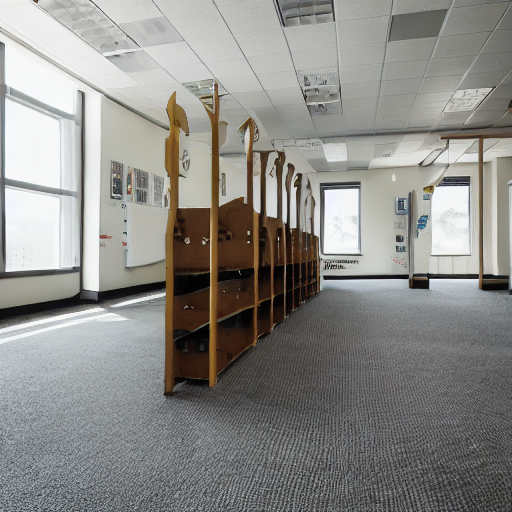

In [14]:
base64_to_image(response["results"][2]["image"])

In [27]:
from typing import Union, List
from typing import List
from pydantic import BaseModel
from openai import OpenAI


class Section(BaseModel):
    description: str
    value: Union[str, List[str]]

class OfficeDesignRequest(BaseModel):
    interior_style: Section
    interior_style2: Section

In [28]:
out = OfficeDesignRequest(
    interior_style=Section(description="xd", value=["raz", "dwa", "trzy"]),
    interior_style2=Section(description="xd", value=["raz", "dwa", "trzy"])
)

In [30]:
del out.interior_style2

In [33]:
out.model_copy()

OfficeDesignRequest(interior_style=Section(description='xd', value=['raz', 'dwa', 'trzy']))

In [31]:
out

OfficeDesignRequest(interior_style=Section(description='xd', value=['raz', 'dwa', 'trzy']))